## Problem statement: Create a medical disgnostic app for predicting diabetes in women

#### Step
1. Data Description
2. Data Cleaning
3. Data Exploration
4. Data Modeling

## Data Description

We have downloaded the data from Kaggle - Pima Indians Diabetes Database (https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database).

This dataset contains several medical predictors and one target variable. The data includes the following features:

1. Pregnancies: Number of times pregnant
2. Glucose: Plasma glucose concentration (mmol/L) after 2 hours in an oral glucose tolerance test
3. BloodPressure: Diastolic blood pressure (mm Hg)
4. SkinThickness: Triceps skinfold thickness (mm)
5. Insulin: 2-hour serum insulin (μU/ml)
6. BMI: Body mass index (weight in kg / (height in m²))
7. DiabetesPedigreeFunction: Diabetes pedigree function (a measure of hereditary risk)
8. Age: Age (years)
9. Outcome: Whether the patient has diabetes (0 for no, 1 for yes). Of the 768 records, 268 have an outcome of 1, while the others are 0. are 0

### Data Exploration

In [515]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [516]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Data Cleaning

1. Check for Null Values
2. Check for Duplicate Rows
3. Check for corrupt Characters


#### 1. Check for null values

In [520]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

##### --There is no Null values in Datasets --

#### 2. Check for Duplicate Rows

In [523]:
df.duplicated().sum()

np.int64(0)

##### -- There is no Duplocate values in Datasets --

#### 3. Check for corrupt Characters

In [526]:
df[~df.map(np.isreal).any(axis=1)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


##### -- There is no corruput characters --

## Data Exploration

1. Bar Plot
2. Correlation/ heat mapmap

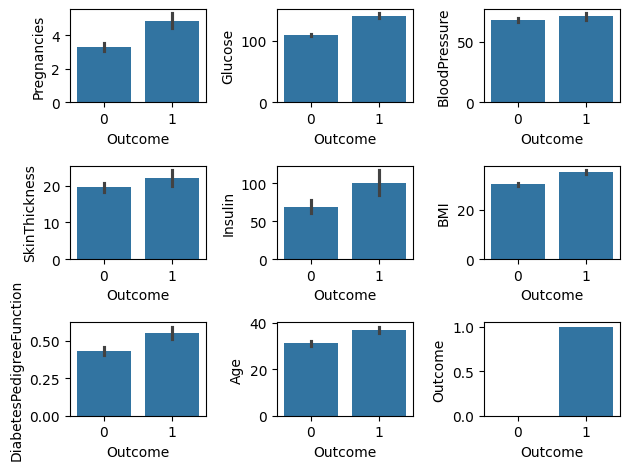

In [530]:
# Barplot
repeat = 1
for i in df.columns.tolist():
    plt.subplot(3,3, repeat)
    sns.barplot(x = df['Outcome'] , y = df[i] )
    repeat += 1
plt.tight_layout()
plt.show()


##### <i> -- <b>Conclusion</b>: Women who have higher avg pregnencies, glucose level, age, bmi, diabetespedigreefunction are more likely to be diabetic --

In [532]:
#Correlation/ heat map
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


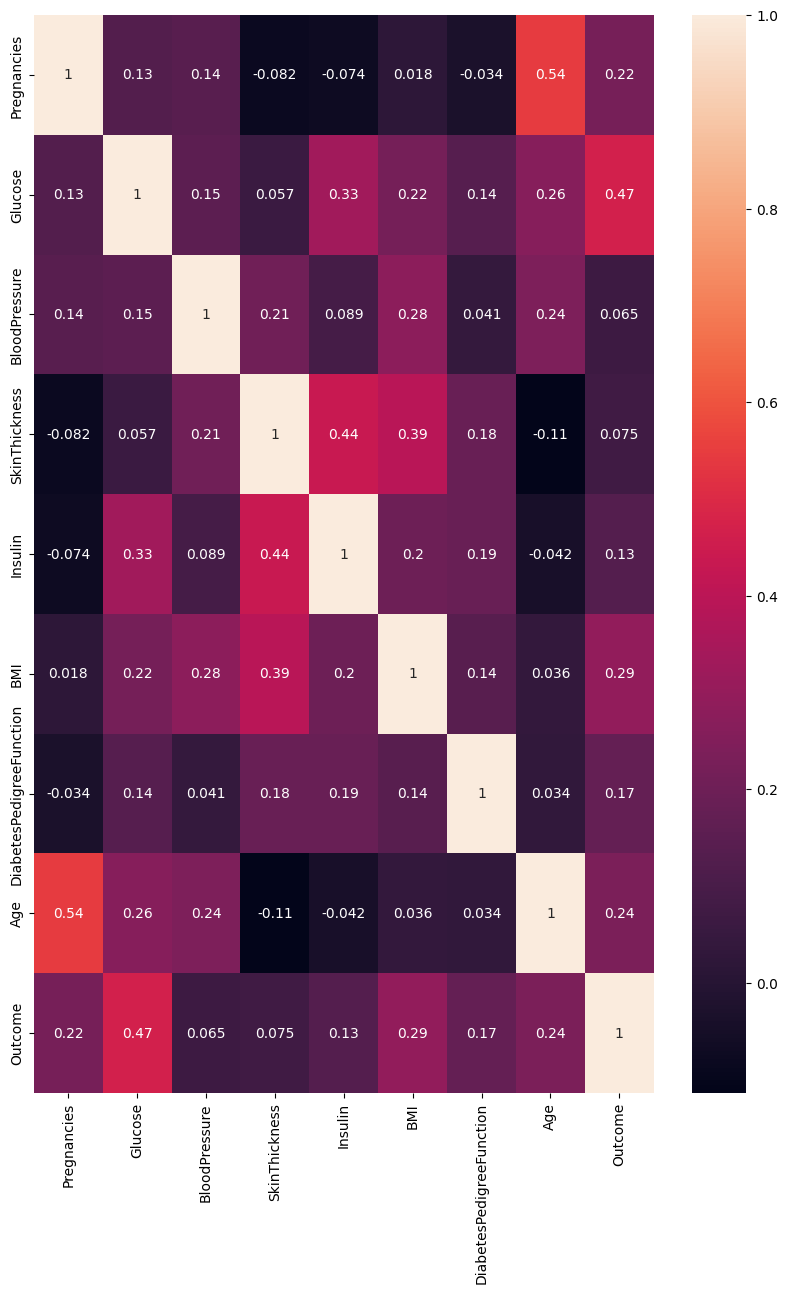

In [533]:
# Heatmap
plt.figure(figsize=(10, 14))
sns.heatmap(df.corr(), annot = True )
plt.show()

In [534]:
# Get Top four features that has the highest correlation
df.corr().nlargest(4, 'Outcome')[['Outcome']].T

,Outcome,Glucose,BMI,Age
Outcome,1.0,0.466581,0.292695,0.238356


##### -- <i><b>Conclusion:</b> You can now see that apart from the Outcome feature, the three most influential features are <b>Glucose, BMI, and Age</b>. We can use these three features to trainour model.</i>


## Data Modeling

<ul>
    <li>Logistic Regression By 10-Fold Cross validation</li>
    <li>Logistic Regression By Train & Test Splits</li>
    <li>K-Nearest Neighbors (KNN)</li>
    <li>Support Vector Machine </li>
</ul>

####  Logistic Regression By 10 Fold Cross validation

In [539]:
x = df[['Glucose', 'BMI', 'Age']]
y = df['Outcome']


In [540]:

from sklearn.model_selection import cross_val_score , KFold
from sklearn.linear_model import LogisticRegression

#creating logistic regression model
log_reg = LogisticRegression(max_iter=200)

#Defind 10 fold cross validation
kf = KFold(n_splits = 10 , shuffle = True, random_state= 42)

# Perform cross-validation and get scores
log_reg_kfold_cross_validation_scores = cross_val_score(log_reg, x ,y , cv=kf, scoring='accuracy').mean()
log_reg_kfold_cross_validation_scores = float(log_reg_kfold_cross_validation_scores)
result = []
result.append(log_reg_kfold_cross_validation_scores)
log_reg_kfold_cross_validation_scores

0.7629528366370472

<i>Using Logistic Regression with a 10-Fold Cross validation, we achieved 77% accuracy. </i>

#### K-Nearest Neighbors (KNN) 10-Fold Cross Validaton

In [543]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 4)

kf = KFold(n_splits=10, shuffle=True, random_state=42)

KNN_Cross_score = cross_val_score(knn,x,y,cv=kf).mean()

result.append(float(KNN_Cross_score))
float(KNN_Cross_score)


0.7134825700615175

<i>Using K-Nearest Neighbors (KNN)  with a 10-Fold cross validation, we achieved 72% accuracy.</i>

#### Support Vector Machine using 10-Fold cross validation - Kernel = Linear

In [546]:
from sklearn.svm import SVC

svm = SVC(kernel = 'linear', C=1.0)
kf = KFold(n_splits=10, shuffle=True, random_state=42)
svm_cross_score = cross_val_score(svm, x,y, cv=kf).mean()
svm_cross_score = float(svm_cross_score)
result.append(svm_cross_score);
svm_cross_score


0.7616541353383459

#### Support Vector Machine using 10-Fold cross validation - Kernel = rbf

In [548]:
from sklearn.svm import SVC

svm = SVC(kernel = 'rbf', C=1.0)
kf = KFold(n_splits=10, shuffle=True, random_state=42)
svm_cross_score = cross_val_score(svm, x,y, cv=kf).mean()
svm_cross_score_rbf = float(svm_cross_score)
result.append(svm_cross_score_rbf)
svm_cross_score_rbf

0.7655844155844156

#### Support Vector Machine using Train_Test Split - Linear

In [550]:
result

[0.7629528366370472,
 0.7134825700615175,
 0.7616541353383459,
 0.7655844155844156]

In [551]:
#Selecting the best performing Algorithm
algorithms = ['logistic_regression','KNN_Cross_score','svm_cross_score','svm_cross_score_rbf']
cv_mean = pd.DataFrame(result, index=algorithms)
#cv_mean
cv_mean.columns = ["Accuracy"]
cv_mean.sort_values(by="Accuracy", ascending=False)

,Accuracy
svm_cross_score_rbf,0.765584
logistic_regression,0.762953
svm_cross_score,0.761654
KNN_Cross_score,0.713483


In [552]:
#training and saving the model
#since the accuracy for logistic_regression_train-testis the highest, we would go with that model
#log_reg_tt

svm_leaner_ttr = SVC(kernel = 'rbf', C=1.0, probability=True)
svm_leaner_ttr.fit(x_train,y_train)

SVC(probability=True)

In [553]:
import pickle

In [586]:
#write to the file using write and binary mode
filename = 'diabetes.sav'
pickle.dump(svm_leaner_ttr, open(filename,'wb'))

In [588]:
loaded_model = pickle.load(open(filename, 'rb'))

In [590]:
#The model is now loaded. Let us do some predictions:
Glucose=80
BMI=120
Age=62

prediction = loaded_model.predict([[Glucose, BMI, Age]])
print(prediction)
if(prediction[0]==0):
    print("Non-Diabetic")
else:
    print("Diabetic")

[0]
Non-Diabetic


In [592]:
#We want to know the probabilities of the prediction and so we get the probabilities and convert them into percentages:
proba = loaded_model.predict_proba([[Glucose, BMI, Age]])
print(proba)
print("Confidence: " + str(round(np.amax(proba[0]) * 100, 2)) + "%")

[[0.59807347 0.40192653]]
Confidence: 59.81%


In [594]:
## #The probabilities printed show the probability of the result being 0 and the probability of the result being 1. The prediction is based on the one with the highest probability, and we use that probability and convert it into the confidence percentage.

In [559]:
# Deploying Model